<a href="https://colab.research.google.com/github/IagoConrado/colab-notebooks/blob/master/Arvore_de_Decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Previsão de insuficiência cardíaca**


*   Link do dataset: [Heart Prediction Failure](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data).
*   Os dados do dataset descrevem características dos pacientes e se eles faleceram durante o acompanhamento.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Imports**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_curve, 
    roc_auc_score
)

## **Leitura dos dados**

In [3]:
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/heart_failure.csv')
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## **Limpeza e organização dos dados**

In [4]:
#verificar se existem valores NAN, ? ou dados faltantes
dados = dados.dropna()

In [5]:
#re-escala dos dados usando maximo e minimo
dados = (dados - dados.min())/(dados.max()-dados.min())

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    float64
 2   creatinine_phosphokinase  299 non-null    float64
 3   diabetes                  299 non-null    float64
 4   ejection_fraction         299 non-null    float64
 5   high_blood_pressure       299 non-null    float64
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    float64
 9   sex                       299 non-null    float64
 10  smoking                   299 non-null    float64
 11  time                      299 non-null    float64
 12  DEATH_EVENT               299 non-null    float64
dtypes: float64(13)
memory usage: 32.7 KB


## **Organizando dados para modelagem**

**Dividir os dados em atributos descritores e atributo de classe(target)**

In [7]:
x = dados.iloc[:,:-1]
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235


In [8]:
y = dados.DEATH_EVENT
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: DEATH_EVENT, dtype: float64

**Dividir os dados em treino e teste**

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
x_train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
31,0.818182,0.0,0.000000,0.0,0.469697,0.0,0.405989,0.280899,0.542857,1.0,0.0,0.085409
173,0.181818,1.0,0.011738,0.0,0.090909,0.0,0.198691,0.033708,0.742857,1.0,0.0,0.505338
288,0.454545,0.0,0.110870,1.0,0.318182,0.0,0.288833,0.067416,0.828571,0.0,0.0,0.896797
125,0.054545,1.0,0.042740,0.0,0.545455,0.0,0.256880,0.089888,0.628571,0.0,0.0,0.330961
145,0.181818,0.0,0.020669,0.0,0.242424,0.0,0.292035,0.022472,0.800000,1.0,1.0,0.384342


In [10]:
y_train.head()

31     1.0
173    0.0
288    0.0
125    0.0
145    0.0
Name: DEATH_EVENT, dtype: float64

## **Árvore de decisão**

In [11]:
arvore = DecisionTreeClassifier()
arvore.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

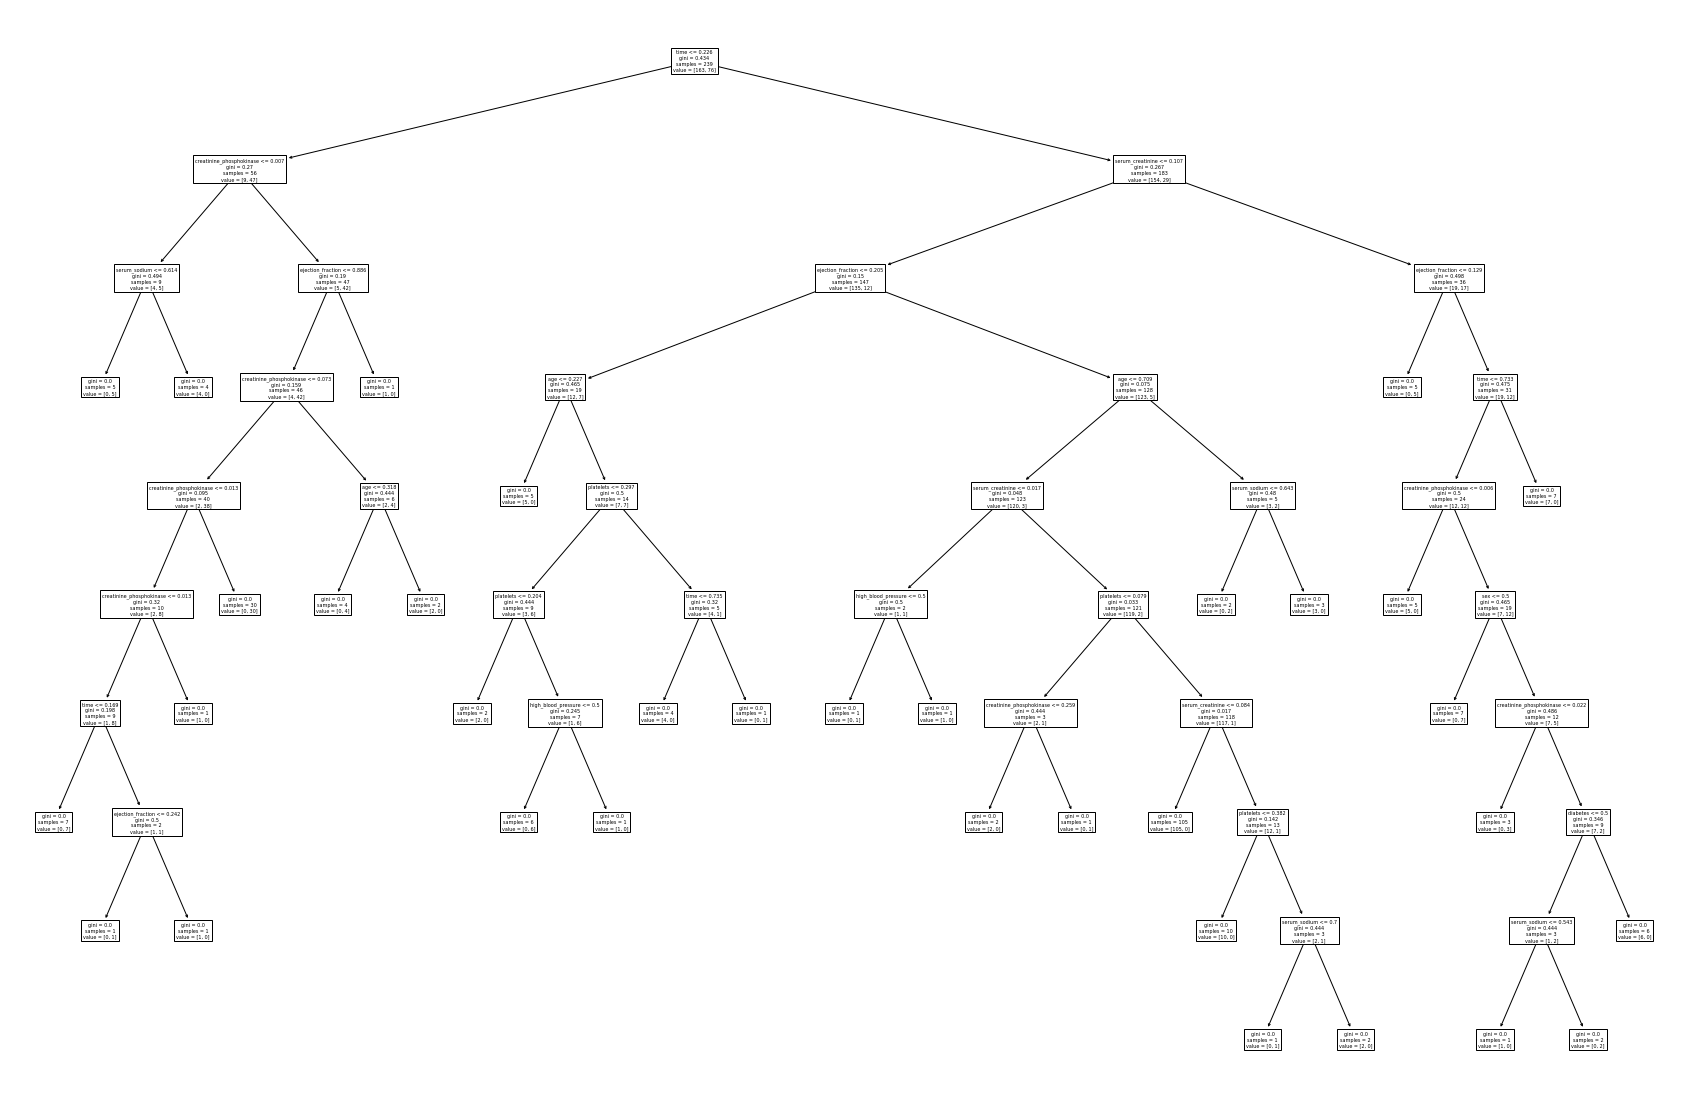

In [12]:
plt.rcParams["figure.figsize"] = (30,20)
plot_tree(arvore,feature_names=dados.columns[:-1])
plt.show()

In [13]:
classificacao_ar = arvore.predict(x_test)

In [14]:
acuracia_ar = accuracy_score(y_test,classificacao_ar)
acuracia_ar

0.85

In [15]:
precisao_ar = precision_score(y_test,classificacao_ar)
precisao_ar

0.7619047619047619

In [16]:
recall_ar = recall_score(y_test,classificacao_ar)
recall_ar

0.8

In [17]:
f1_ar = f1_score(y_test,classificacao_ar)
f1_ar

0.7804878048780488

## **Random forest**

In [18]:
floresta = RandomForestClassifier(n_estimators=100)
floresta.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
classificacao_fl = floresta.predict(x_test)

In [20]:
acuracia_fl = accuracy_score(y_test,classificacao_fl)
acuracia_fl

0.85

In [21]:
precisao_fl = precision_score(y_test,classificacao_fl)
precisao_fl

0.8235294117647058

In [22]:
recall_fl = recall_score(y_test,classificacao_fl)
recall_fl

0.7

In [23]:
f1_fl = f1_score(y_test,classificacao_fl)
f1_fl

0.7567567567567567

## **Comparando árvore de decisão com random forest**

## **Método Holdout**

In [24]:
#acurácia da árvore de decisão
acuracia_ar

0.85

In [25]:
#acurácia da random forest
acuracia_fl

0.85

In [26]:
#calculando curva roc da árvore de decisão
fpr_ar, tpr_ar, _ = roc_curve(y_test,classificacao_ar)

In [27]:
#calculando curva roc da random forest
fpr_fl, tpr_fl, _ = roc_curve(y_test,classificacao_fl)

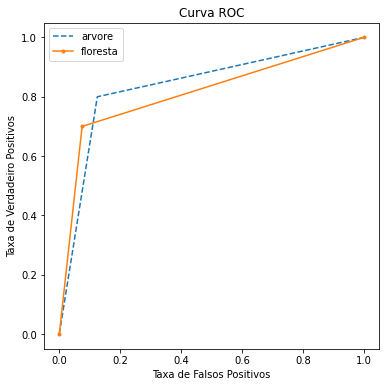

In [31]:
#plotando curvas
plt.plot(fpr_ar,tpr_ar,linestyle='--',label='arvore')
plt.plot(fpr_fl,tpr_fl,marker='.',label='floresta')
plt.title('Curva ROC')
plt.legend()
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.rcParams["figure.figsize"] = (6,6)
plt.show()

## **Validação cruzada**

**Cálculos com a árvore de decisão e random forest criadas anteriormente**

In [29]:
#calculando os scores da árvore
scores = cross_val_score(arvore,x,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.709, 0.176)

In [30]:
#calculando os scores da floresta
scores = cross_val_score(floresta,x,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.756, 0.152)

**Cálculos com uma nova árvore de decisão e uma nova random forest**

In [48]:
#criando árvore
nova_arvore = DecisionTreeClassifier()

#calculando os scores
scores = cross_val_score(nova_arvore,x,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.702, 0.158)

In [33]:
#criando floresta
nova_floresta = RandomForestClassifier()

#calculando os scores
scores = cross_val_score(nova_floresta,x,y,cv=10)
round(scores.mean(),3),round(scores.std(),3)

(0.769, 0.153)